# Mini Projet 1
## Gabriel Rieger Junqueira
### Q1

Lire les données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 

from matplotlib.legend_handler import HandlerLine2D
from numpy.linalg import inv
train =  (np.genfromtxt('Dataset_1_train.csv', delimiter=',',dtype=float))[:,0:2]
valid   =  (np.genfromtxt('Dataset_1_valid.csv', delimiter=',',dtype=float))[:,0:2]
test  =  (np.genfromtxt('Dataset_1_test.csv', delimiter=',', dtype=float))[:,0:2]

In [2]:
print(train.shape)
print(valid.shape)
print(test.shape)

(50, 2)
(50, 2)
(50, 2)


### Créer dataset de train, valid et test:

In [3]:
X_train = train[:,0:1]
Y_train = train[:,1:2]

X_valid = valid[:,0:1]
Y_valid = valid[:,1:2]

X_test = test[:,0:1]
Y_test = test[:,1:2]

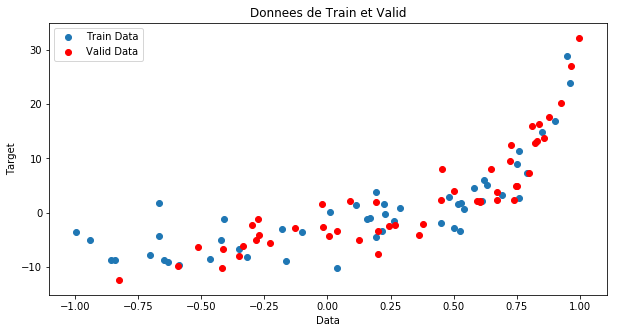

In [4]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Donnees de Train et Valid')
ax.scatter(x=X_train,y=Y_train,label='Train Data')
ax.scatter(x=X_valid,y=Y_valid,label='Valid Data',color='red')
ax.set_xlabel('Data')
ax.set_ylabel('Target')
ax.legend(loc='best');


### generer les 21 coeficients du polynome

In [5]:

#j'ai pris la formule dans https://en.wikipedia.org/wiki/Polynomial_regression#:~:text=In%20statistics%2C%20polynomial%20regression%20is,nth%20degree%20polynomial%20in%20x.

mat_X_train = np.ones((X_train.shape[0],21), dtype=np.float)
for i in range(21):
    mat_X_train[:,i] =  np.power(X_train, 20-i).ravel()
X_train = mat_X_train 

mat_X_valid = np.ones((X_valid.shape[0],21), dtype=np.float)
for i in range(21):
    mat_X_valid[:,i] =  np.power(X_valid, 20-i).ravel()
X_valid = mat_X_valid

# Ajuster et calculer y_pred

In [6]:
a = inv(np.dot(X_train.T,X_train))
b = np.dot(X_train.T,Y_train)
W = np.dot(a,b)
Y_pred_train = np.dot(X_train,W)
Y_pred_valid = np.dot(X_valid,W)

In [7]:
X_range = np.arange(np.amin(X_train),np.amax(X_train),0.01)
mat_X_train = np.ones((X_range.shape[0],21), dtype=np.float)
for i in range(21):
    mat_X_train[:,i] =  np.power(X_range, 20-i).ravel()
Y_nouveau = np.dot(mat_X_train,W)

### Calcul du  MSE

In [9]:
MSE_train = np.dot((Y_train-Y_pred_train).T, (Y_train-Y_pred_train))/Y_train.shape[0]
MSE_valid = np.dot((Y_valid-Y_pred_valid).T, (Y_valid-Y_pred_valid))/Y_valid.shape[0]
print(MSE_train)
print(MSE_valid)

[[6.47474813]]
[[1426.83965956]]


In [10]:
summation = 0  #variable to store the summation of differences
n = len(Y_train) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = Y_train[i] - Y_pred_train[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE_TRAIN = summation/n  #dividing summation by total values to obtain average
print("MSE pour Train"  , MSE_TRAIN)



summation = 0  #variable to store the summation of differences
n = len(Y_train) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = Y_valid[i] - Y_pred_valid[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE_VALID = summation/n  #dividing summation by total values to obtain average
print("MSE pour Valid: " , MSE_VALID)


#(Y_train-Y_pred_train).T, (Y_train-Y_pred_train))/Y_train.shape[0]
#MSE_valid = np.dot((Y_valid-Y_pred_valid).T, (Y_valid-Y_pred_valid))/Y_valid.shape[0]

('MSE pour Train', array([6.47474813]))
('MSE pour Valid: ', array([1426.83965956]))


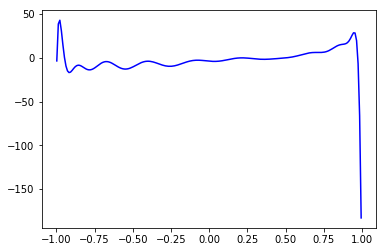

In [11]:
plt.plot(X_range, Y_nouveau,color='blue',label='Our Fitting Line')

plt.show()

In [12]:
#Graph pour Train

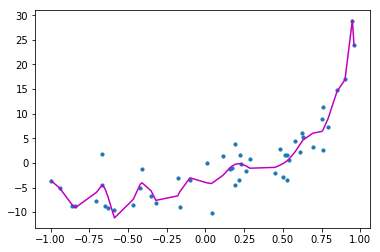

In [13]:
import operator

X_train = train[:,0:1]
Y_train = train[:,1:2]



plt.scatter(X_train, Y_train, s=10)
#sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,Y_pred_train), key=sort_axis)
X_train, Y_pred_train = zip(*sorted_zip)
plt.plot(X_train, Y_pred_train, color='m')
plt.show()

In [14]:
#Graph pour Valid

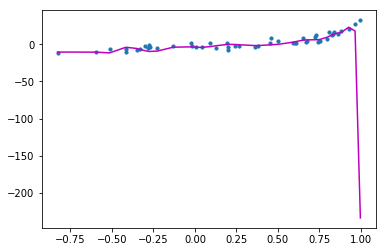

In [15]:
X_valid = valid[:,0:1]
Y_valid = valid[:,1:2]



plt.scatter(X_valid, Y_valid, s=10)
#sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_valid,Y_pred_valid), key=sort_axis)
X_valid, Y_pred_valid = zip(*sorted_zip)
plt.plot(X_valid, Y_pred_valid, color='m')
plt.show()

# Ridge L2

In [16]:
#j'ai pris la formule dans https://en.wikipedia.org/wiki/Tikhonov_regularization

X_train = train[:,0:1]
Y_train = train[:,1:2]

X_valid = valid[:,0:1]
Y_valid = valid[:,1:2]

mat_X_train = np.ones((X_train.shape[0],21), dtype=np.float)
for i in range(21):
    mat_X_train[:,i] =  np.power(X_train, 20-i).ravel()
X_train = mat_X_train 



mat_X_valid = np.ones((X_valid.shape[0],21), dtype=np.float)
for i in range(21):
    mat_X_valid[:,i] =  np.power(X_valid, 20-i).ravel()
X_valid = mat_X_valid

pas = 20
Lamda = np.arange(0,1,1.0/pas)
P_ridge = np.zeros((pas,21), dtype=float)
Y_ridge_train = np.zeros((pas,50), dtype=float)
Y_ridge_valid = np.zeros((pas,50), dtype=float)

MSE_train_Ridge = np.zeros((pas,), dtype=float)
MSE_valid_Ridge = np.zeros((pas,), dtype=float)

print(Lamda)
for i in range(pas):
    P1 = inv(np.dot(X_train.T,X_train)+np.dot(Lamda[i],np.identity(21)))
    P2 = np.dot(X_train.T,Y_train)
    P_ridge[i,:]  = np.dot(P1,P2).ravel()
    Y_ridge_train[i,:]  = np.dot(X_train,P_ridge[i])
    Y_ridge_valid[i,:] = np.dot(X_valid,P_ridge[i])
    MSE_train_Ridge[i] = np.dot((Y_train-Y_ridge_train[i:i+1,:].T).T, (Y_train-Y_ridge_valid[i:i+1,:].T)).ravel()
    MSE_valid_Ridge[i] = np.dot((Y_valid-Y_ridge_valid[i:i+1,:].T).T, (Y_valid-Y_ridge_valid[i:i+1,:].T)).ravel()


MSE_train_Ridge      = MSE_train_Ridge/Y_train.shape[0];
MSE_valid_Ridge = MSE_valid_Ridge/Y_valid.shape[0]

print("MSE pour train Ridge")
print(MSE_train_Ridge)

print("MSE pour valid Ridge")
print(MSE_valid_Ridge)
 



[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]
MSE pour train Ridge
[ 6.0953723   9.42029985  9.43751594  9.50481759  9.59115816  9.68679457
  9.78757511  9.8914053   9.99710751 10.10396736 10.21152635 10.31947721
 10.42760681 10.53576318 10.6438355  10.75174147 10.85941903 10.96682078
 11.0739102  11.18065894]
MSE pour valid Ridge
[1426.83965956    9.19337439    9.29160515    9.35414911    9.39703715
    9.42913141    9.45492204    9.47686213    9.49638992    9.51439805
    9.53146623    9.54798498    9.56422531    9.58037986    9.59658836
    9.61295371    9.62955274    9.64644331    9.6636693     9.68126412]


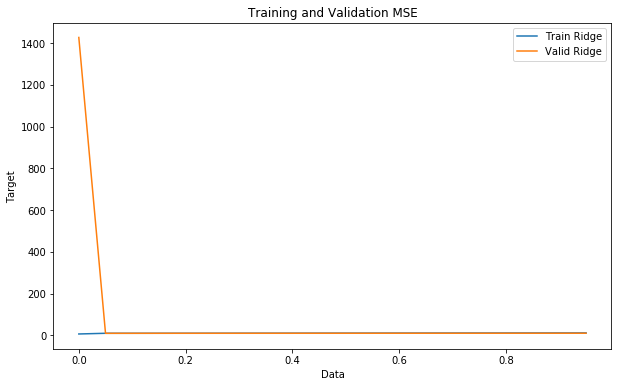

In [17]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title('Training and Validation MSE')
plt.plot(Lamda,MSE_train_Ridge,      label="Train Ridge"     )
plt.plot(Lamda,MSE_valid_Ridge, label="Valid Ridge")
ax.set_xlabel('Data')
ax.set_ylabel('Target')
ax.legend(loc='best')
plt.show()

## Trouver la meilleur droit selon le MSE valid

In [18]:
mat_X_train = np.ones((X_range.shape[0],21), dtype=np.float)
for i in range(21):
    mat_X_train[:,i] =  np.power(X_range, 20-i).ravel()

In [53]:
Meilleur_ajustement = np.argmin(MSE_valid_Ridge)
Y_nouveau = np.dot(mat_X_train,P_ridge[Meilleur_ajustement])
print("indice du meilleur ajustement est",Meilleur_ajustement)
print("La valeur de lambda est",Lamda[Meilleur_ajustement])

('indice du meilleur ajustement est', 1)
('La valeur de lambda est', 0.05)


In [20]:
mat_X_test = np.ones((X_test.shape[0],21), dtype=np.float)
for i in range(21):
    mat_X_test[:,i] =  np.power(X_test, 20-i).ravel()
Y_ridge_pred_test = np.dot(mat_X_test,P_ridge[Meilleur_ajustement]).reshape(50,1)
MSE_ridge_test = np.dot((Y_test-Y_ridge_pred_test).T, (Y_test-Y_ridge_pred_test))/Y_test.shape[0]
print('MSE Test Pour Ridge', MSE_ridge_test)

('MSE Test Pour Ridge', array([[10.61364362]]))


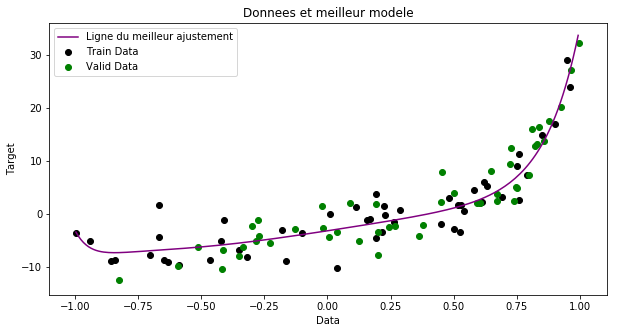

In [21]:


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Donnees et meilleur modele')
ax.scatter(train[:,0:1],train[:,1:2],label='Train Data',color='black')
ax.scatter(valid[:,0:1],valid[:,1:2],label='Valid Data',color='green')
plt.plot(X_range, Y_nouveau,color='purple',label='Ligne du meilleur ajustement')
ax.set_xlabel('Data')
ax.set_ylabel('Target')
ax.legend(loc='best');
plt.show()

In [22]:
#Question 2

In [23]:

train_2 =  (np.genfromtxt('Dataset_2_train.csv', delimiter=',',dtype=float))[:,0:2]
valid_2   =  (np.genfromtxt('Dataset_2_valid.csv', delimiter=',',dtype=float))[:,0:2]
test_2  =  (np.genfromtxt('Dataset_2_test.csv', delimiter=',', dtype=float))[:,0:2]

In [24]:
X_train_2 = train_2[:,0:1]
Y_train_2 = train_2[:,1:2]
X_valid_2 = valid_2[:,0:1]
Y_valid_2 = valid_2[:,1:2]
X_test_2 = test_2[:,0:1]
Y_test_2 = test_2[:,1:2]

In [25]:
order = 1

mat_X_train_2 = np.ones((X_train_2.shape[0],order+1), dtype=np.float)
for i in range(order+1):
    mat_X_train_2[:,i:i+1] =  np.power(X_train_2, order-i)

mat_x_valid_2 = np.ones((X_valid_2.shape[0],order+1), dtype=np.float)
for i in range(order+1):
    mat_x_valid_2[:,i:i+1] =  np.power(X_valid_2, order-i)
    
mat_x_test_2 = np.ones((X_test_2.shape[0],order+1), dtype=np.float)
for i in range(order+1):
    mat_x_test_2[:,i:i+1] =  np.power(X_test_2, order-i)



In [55]:
Poids_2 =np.ones((2,1), dtype=np.float)
epochs_2 = 10000
alpha_2 = 1e-06
MSE_valid_2 = np.zeros((epochs_2,1))
MSE_test_2       = np.zeros((epochs_2,1))
MSE_train_2      = np.zeros((epochs_2,1))
Poids_2_array        = np.zeros((epochs_2,2,1))
counter =0
Threshold = 1e-05
for i in range(epochs_2):
    index= np.random.permutation(train_2.shape[0])
    #Iterate over dataset for epochs times
    Poids_2_array[counter] = Poids_2
    for j in range(train_2.shape[0]):
        table = np.array(mat_X_train_2[index[j],:]).reshape((1, 2))
        eder = - alpha_2*2*(np.dot(np.dot(table.T,table),Poids_2) - np.dot(table.T,Y_train_2[index[j]]).reshape(2,1))
        Poids_2 = Poids_2 + eder;  
    diff =  np.absolute(np.sum(Poids_2_array[counter]-Poids_2))   
    MSE_valid_2[i] = np.dot((Y_valid_2-np.dot(mat_x_valid_2,Poids_2)).T, (Y_valid_2-np.dot(mat_x_valid_2,Poids_2)))/Y_valid_2.shape[0]
    MSE_test_2[i] = np.dot((Y_test_2-np.dot(mat_x_test_2,Poids_2)).T, (Y_test_2-np.dot(mat_x_test_2,Poids_2)))/Y_test_2.shape[0]
    MSE_train_2[i] = np.dot((Y_train_2-np.dot(mat_X_train_2,Poids_2)).T, (Y_train_2-np.dot(mat_X_train_2,Poids_2)))/Y_train_2.shape[0]
    
    counter +=1
    if diff < Threshold:
        break
counter -=1
print counter

6882


In [56]:
print('MSE pour train',MSE_train_2[counter])
print('MSE pour valid',MSE_valid_2[counter])
print('MSE pour teste',MSE_test_2[counter])

('MSE pour train', array([0.12725264]))
('MSE pour valid', array([0.12706128]))
('MSE pour teste', array([0.09673425]))


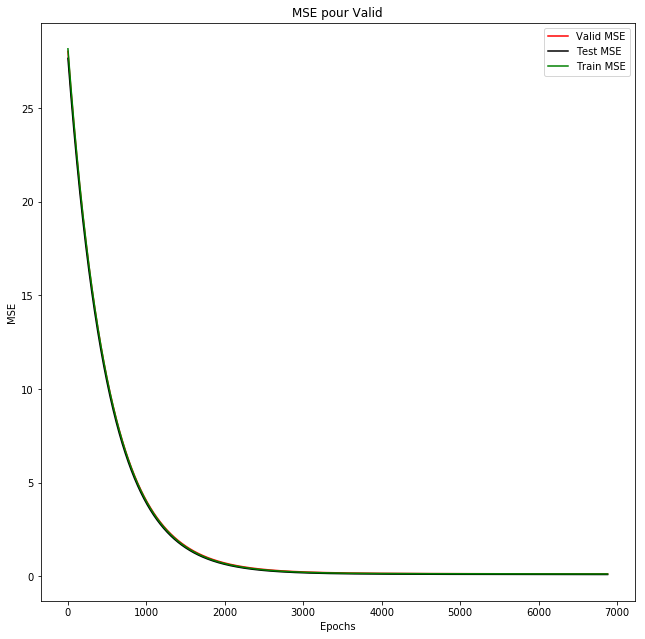

In [28]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(888)
ax.set_title('MSE pour Valid')
plt.plot(range(counter),MSE_valid_2[:counter,], label="Valid MSE",color="red")
plt.plot(range(counter),MSE_test_2[:counter,], label="Test MSE", color="black")
plt.plot(range(counter),MSE_train_2[:counter,], label="Train MSE", color="green")
#plt.axis([0, 100, 0, 50])


ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
ax.legend(loc='best')

plt.show()

In [29]:
#5 viz

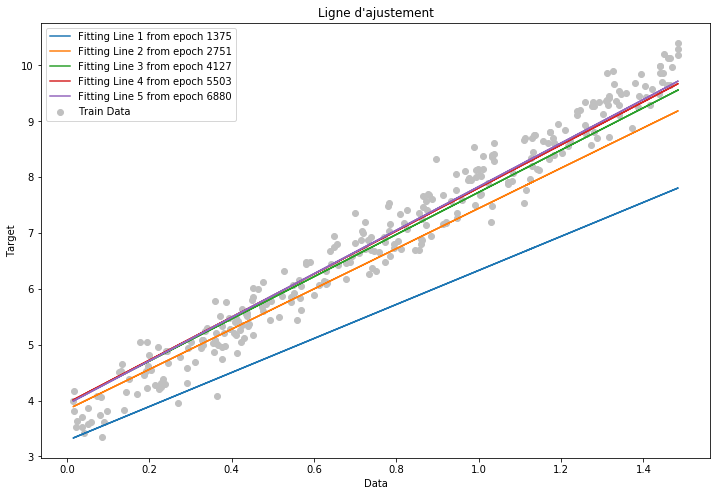

In [30]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title("Ligne d'ajustement")
ax.scatter(x=X_train_2,y=Y_train_2,label='Train Data',color='silver')
for i in range(5):
    index = (int)((1+i)*counter/5)
    index = index-1
    Y_nouveau_2 = np.dot(mat_X_train_2,Poids_2_array[index])
    plt.plot(X_train_2, Y_nouveau_2,label='Fitting Line %d from epoch %d'%(i+1,index))
ax.set_xlabel('Data')
ax.set_ylabel('Target')
ax.legend(loc='best');
plt.show()


In [31]:
## Essaie des differents taux d'apprentissage

In [32]:
W =np.ones((2,1), dtype=np.float)
epochs = 1000
alpha = 1e-6
pas = 6
rate = 5

MSE_valid = np.zeros((pas,1))
MSE_test       = np.zeros((pas,1))
MSE_train      = np.zeros((pas,1))
W_array        = np.zeros((pas,2,1))
counter =0
Threshold = 3e-05*75
for i in range(pas):
    index= np.random.permutation(train_2.shape[0])
    #Iterate over dataset for epochs times
    W_array[counter] = W
    for j in range(train_2.shape[0]):
        data = np.array(mat_X_train_2[index[j],:]).reshape((1, 2))
        eder = - np.power(rate,i)*alpha*2*(np.dot(np.dot(data.T,data),W) - np.dot(data.T,Y_train_2[index[j]]).reshape(2,1))
        W = W + eder;  
    diff =  np.absolute(np.sum(W_array[counter]-W))   
    MSE_valid[i] = np.dot((Y_valid_2-np.dot(mat_x_valid_2,W)).T, (Y_valid_2-np.dot(mat_x_valid_2,W)))/Y_valid_2.shape[0]
    MSE_test      [i] = np.dot((Y_test_2-np.dot(mat_x_test_2,W)).T, (Y_test_2-np.dot(mat_x_test_2,W)))/Y_test_2.shape[0]
    MSE_train     [i] = np.dot((Y_train_2-np.dot(mat_X_train_2,W)).T, (Y_train_2-np.dot(mat_X_train_2,W)))/Y_train_2.shape[0]
    
    counter +=1
    if diff < Threshold:
        break
counter -=1




In [33]:
print('MSE pour Train',MSE_train)

print('MSE pour Valid',MSE_valid)

print('MSE pour Test',MSE_test)


('MSE pour Train', array([[28.15979119],
       [27.88315889],
       [26.54040931],
       [20.73947091],
       [ 6.11438077],
       [ 0.15725863]]))
('MSE pour Valid', array([[28.02452976],
       [27.75029372],
       [26.41910702],
       [20.66662939],
       [ 6.14222917],
       [ 0.16671466]]))
('MSE pour Test', array([[27.64924999],
       [27.37723957],
       [26.05693467],
       [20.35316891],
       [ 5.97628126],
       [ 0.12624132]]))


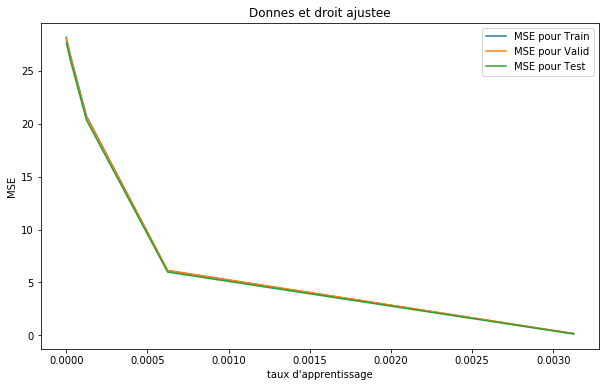

In [34]:
axe_x= np.power(rate,range(pas))*alpha
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title('Donnes et droit ajustee')
plt.plot(axe_x, MSE_train,label='MSE pour Train')
plt.plot(axe_x, MSE_valid,label='MSE pour Valid')
plt.plot(axe_x, MSE_test,label='MSE pour Test')

ax.set_xlabel("taux d'apprentissage")
ax.set_ylabel('MSE')
ax.legend(loc='best');
plt.show()

In [35]:
#Question 3

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 

from matplotlib.legend_handler import HandlerLine2D
from numpy.linalg import inv
dataset =  (np.genfromtxt('communities.data', delimiter=',',dtype=float))


In [37]:
X_3 = dataset[:,5:-1]
Y_3 = dataset[:,-1:]
print(X_3.shape)
print(Y_3.shape)


(1994, 122)
(1994, 1)


In [58]:
# calcul moyenne
moy_1 =  np.nanmean(X_3, axis=0)
index= np.isnan(X_3)
index[:,3] = False
for i in range(X_3.shape[1]):
    X_3[index[:,i],i] = moy_1[i]
    
moy_2 =  np.mean(X_3, axis=0)
index= np.isnan(X_3)

In [57]:
#Validation Croisée

In [59]:
np.random.seed(30)

index_3= np.random.randint(5, size=X_3.shape[0])
plis = 5 
MSE_train_3      = np.zeros((plis,), dtype=float)
MSE_valid_3 = np.zeros((plis,), dtype=float)
W_array_3 = np.zeros((5,122),dtype=float)
for i in range(plis):
    TS = X_3[index_3 !=i]
    VS = X_3[index_3 == i]
    TSy = Y_3[index_3 !=i]
    VSy = Y_3[index_3 == i]
    a_3 = inv(np.dot(TS.T,TS))
    b_3 = np.dot(TS.T,TSy)
    W_3 = np.dot(a_3,b_3)
    nom_Train = "CandC-train%d.csv"%(i+1);
    nom_Valid = "CandC-test%d.csv"%(i+1)
    np.savetxt(nom_Train, np.concatenate((TS, TSy), axis=1), delimiter=',')
    np.savetxt(nom_Valid, np.concatenate((VS, VSy), axis=1), delimiter=',')
    Y_pred_3  = np.dot(TS,W_3 )
    Y_valid_3 = np.dot(VS,W_3 )
    MSE_train_3[i]      = np.dot((TSy-Y_pred_3).T, (TSy-Y_pred_3))/TSy.shape[0]
    MSE_valid_3[i] = np.dot((VSy-Y_valid_3).T, (VSy-Y_valid_3))/VSy.shape[0]
    W_array_3[i] = W_3.reshape(122)

print('MSE train',MSE_train_3)
print('MSE valid',MSE_valid_3)


('MSE train', array([0.01653138, 0.01584503, 0.0159012 , 0.0162319 , 0.01532885]))
('MSE valid', array([0.0171729 , 0.02039048, 0.02132102, 0.01867044, 0.63520837]))


In [60]:
print("MSE minimum train est:",MSE_train_3[np.argmin(MSE_train_3)])
print('Bitcoin ce le futur')
print( "MSE minimum valid est:",MSE_valid_3[np.argmin(MSE_valid_3)])

('MSE minimum train est:', 0.015328850722763472)
Bitcoin ce le futur
('MSE minimum valid est:', 0.017172903686204253)


In [42]:
print('Moyenne pour MSE train:',(np.sum(MSE_train_3)/MSE_train_3.shape[0]))

print('Moyenne pour MSE valid:',(np.sum(MSE_valid_3)/MSE_valid_3.shape[0]))

('Moyenne pour MSE train:', 0.01596767260351408)
('Moyenne pour MSE valid:', 0.14255264520197777)


In [43]:
## Parametres d'apprentissage 

In [44]:
for i in range(5):
    print W_array_3[i]
    print 

[ 1.08552499e-01 -5.61520533e-02  2.05518676e-01 -4.34405342e-02
  8.48817389e-03  7.37113839e-02  1.47838791e-01 -1.07788169e-01
 -2.63577988e-01  7.71504911e-02 -2.23749751e-01  4.19603020e-02
 -2.77822909e-01 -1.72780293e-01  3.47883762e-02 -1.50650952e-01
  1.19182848e-01  3.47314818e-02 -8.61491222e-02  3.47834597e-01
  2.69329252e-01 -4.73831502e-01 -2.38938663e-02 -3.71049118e-02
  6.40444382e-03  3.63134756e-02  3.79316898e-02  1.35415268e-01
 -1.37951397e-01 -1.50766550e-01  1.21143300e-01  1.03099990e-01
  9.40572264e-03  2.22525472e-01 -5.12245553e-02 -9.41836509e-03
  3.72659928e-02  1.06416294e-02  2.11303602e-01  2.17754624e-01
 -5.17381384e-02 -1.53816001e-01 -1.13867651e-01 -1.15708966e-02
 -2.92544853e-01 -2.25228666e-02  5.64883324e-03  4.97147676e-02
 -1.39004463e-01 -1.83615751e-01  1.10804266e-01 -1.32740761e-01
  1.73667176e-02  2.12895710e-02 -7.06364417e-02  3.29556489e-02
  8.83933932e-03 -1.98915714e-01  3.69600100e-01 -1.27843267e-01
 -1.24134921e-02 -7.75278

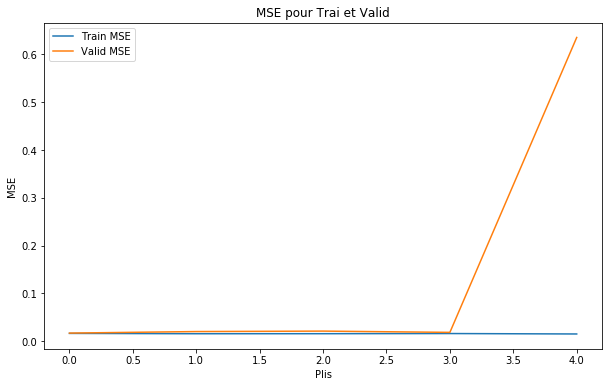

In [45]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title('MSE pour Trai et Valid')
plt.plot(range(5),MSE_train_3,      label="Train MSE"     )
plt.plot(range(5),MSE_valid_3, label="Valid MSE")
ax.set_xlabel('Plis')
ax.set_ylabel('MSE')
ax.legend(loc='best')



plt.show()

In [46]:
# Regression Ridge

In [47]:

steps_3 = 10
plis_ridge = 5 
index_ridge_3= np.random.randint(plis_ridge, size=X_3.shape[0])

W_ridge_3 = np.zeros((steps_3,X_3.shape[1]), dtype=float)


MSE_train_ridge_3      = np.zeros((steps_3,plis_ridge), dtype=float)
MSE_valid_ridge_3 = np.zeros((steps_3,plis_ridge), dtype=float)
Lamda_ridge_3 = np.arange(0,1,1.0/steps_3)

for i in range(steps_3):
    for j in range(plis_ridge):
        TS_r = X_3[index_ridge_3 !=j]
        VS_r = X_3[index_ridge_3 == j]
        TSy_r = Y_3[index_ridge_3 !=j]
        VSy_r = Y_3[index_ridge_3 == j]
        a_r = inv(np.dot(TS.T,TS)) +np.dot(Lamda_ridge_3[i],np.identity(122))
        b_r = np.dot(TS.T,TSy)
        W_ridge_3[j,:]  = np.dot(a_r,b_r).ravel()
        Y_ridge_3  = np.dot(TS_r,W_ridge_3[j])
        Y_ridge_v_3 = np.dot(VS_r,W_ridge_3[j])
        Y_ridge_3 = Y_ridge_3.reshape(Y_ridge_3.shape[0],1)
        Y_ridge_v_3 = Y_ridge_v_3.reshape(Y_ridge_v_3.shape[0],1)
        MSE_train_ridge_3[i,j]      = np.dot((TSy_r-Y_ridge_3).T, (TSy_r-Y_ridge_3))/TSy_r.shape[0]
        MSE_valid_ridge_3[i,j] = np.dot((VSy_r-Y_ridge_v_3).T, (VSy_r-Y_ridge_v_3))/VSy_r.shape[0]
    

print('MSE Train',MSE_train_ridge_3)
print('MSE Valid',MSE_valid_ridge_3)

('MSE Train', array([[1.70557676e-01, 1.70882115e-01, 1.68952131e-01, 1.69020054e-02,
        1.70320195e-01],
       [5.50849924e+05, 5.48758518e+05, 5.51896390e+05, 5.48346575e+05,
        5.50560936e+05],
       [2.20343702e+06, 2.19506698e+06, 2.20761911e+06, 2.19338712e+06,
        2.20227168e+06],
       [4.95776145e+06, 4.93892557e+06, 4.96716832e+06, 4.93512165e+06,
        4.95513239e+06],
       [8.81382322e+06, 8.78033427e+06, 8.83054403e+06, 8.77355017e+06,
        8.80914309e+06],
       [1.37716223e+07, 1.37192931e+07, 1.37977462e+07, 1.37086727e+07,
        1.37643038e+07],
       [1.98311588e+07, 1.97558020e+07, 1.98687749e+07, 1.97404892e+07,
        1.98206144e+07],
       [2.69924326e+07, 2.68898611e+07, 2.70436302e+07, 2.68689996e+07,
        2.69780750e+07],
       [3.52554437e+07, 3.51214703e+07, 3.53223119e+07, 3.50942041e+07,
        3.52366856e+07],
       [4.46201922e+07, 4.44506295e+07, 4.47048201e+07, 4.44161025e+07,
        4.45964462e+07]]))
('MSE Valid', 

In [48]:
print("Moyenne MSE train Ridge: ",(np.sum(MSE_train_ridge_3, axis=1)/MSE_train_ridge_3.shape[0]))

print("Moyenne MSE valid Ridge: ",(np.sum(MSE_valid_ridge_3, axis=1)/MSE_valid_ridge_3.shape[0]))

('Moyenne MSE train Ridge: ', array([6.97614122e-02, 2.75041234e+05, 1.10017819e+06, 2.47541094e+06,
       4.40073948e+06, 6.87616381e+06, 9.90168393e+06, 1.34772998e+07,
       1.76030116e+07, 2.22788191e+07]))
('Moyenne MSE valid Ridge: ', array([6.86016470e-02, 2.74993633e+05, 1.09998754e+06, 2.47498179e+06,
       4.39997638e+06, 6.87497131e+06, 9.89996658e+06, 1.34749622e+07,
       1.75999582e+07, 2.22749545e+07]))


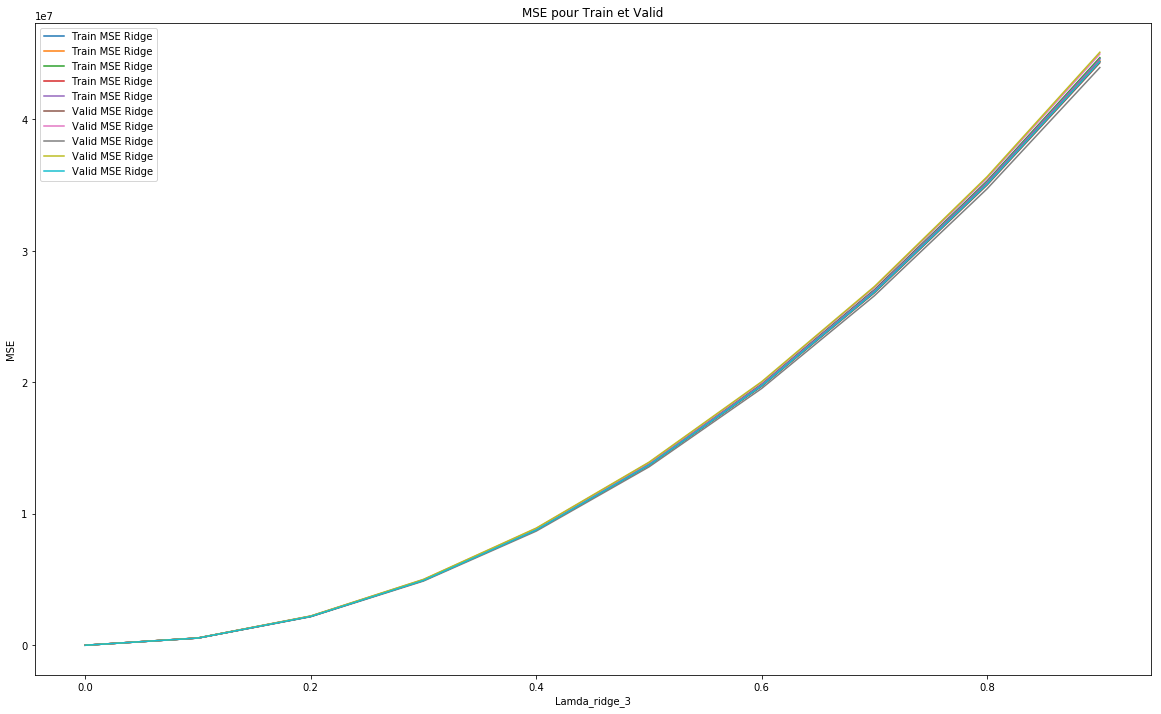

In [49]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.set_title('MSE pour Train et Valid')
plt.plot(Lamda_ridge_3,MSE_train_ridge_3,      label="Train MSE Ridge"     )
plt.plot(Lamda_ridge_3,MSE_valid_ridge_3, label="Valid MSE Ridge")
ax.set_xlabel('Lamda_ridge_3')
ax.set_ylabel('MSE ')
ax.legend(loc='best')
plt.show()

In [62]:
print('parametre min',W_ridge_3[np.argmin(MSE_valid_ridge_3)])



('parametre min', array([   36.28443233,   156.23042373,   114.99641945,   201.26614128,
          53.80364959,    73.10535617,   147.23626139,   174.82544109,
         119.41929502,   150.05140521,    38.12877574,   248.78623914,
          93.39504436,   171.17193401,    89.21108127,   135.12391351,
         168.92485889,   151.60424111,   158.75747144,    99.64316457,
          97.49919885,   113.29952725,    83.3121471 ,    64.64550216,
          99.9864204 ,    88.30761116,   117.48171755,    39.34746982,
         143.02391039,   137.57860922,   163.94778896,   102.01592124,
         156.97197653,   152.00801002,   130.63244684,   147.84509388,
         152.24602131,   130.78325515,   189.1012454 ,   166.1748574 ,
         198.68619694,   201.08332107,   173.73574721,   161.01027413,
         160.69871747,   177.53808423,   156.7684103 ,   169.13278501,
         170.23781331,    30.08740265,   142.036183  ,    19.07882121,
         120.9085225 ,   137.70978969,   152.08043754,   16

In [61]:
print('Parametre max',W_ridge_3[np.argmax(MSE_valid_ridge_3)]) 

IndexError: index 48 is out of bounds for axis 0 with size 10